In [19]:
import pandas as pd
import numpy as np
import glob
import os
import common 

pd.set_option('display.float_format', '{:.2f}'.format)
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [21]:
path = r'../data/suv_all_02-02-2022'
df = common.read_cars_data(path)

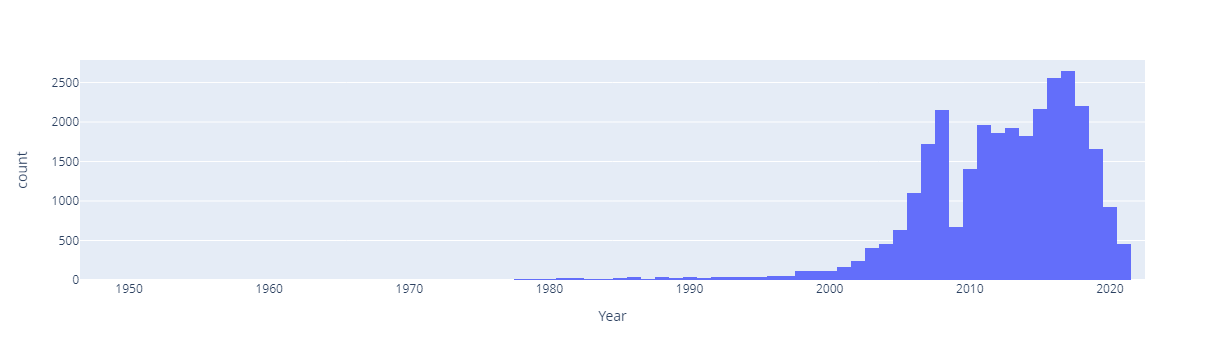

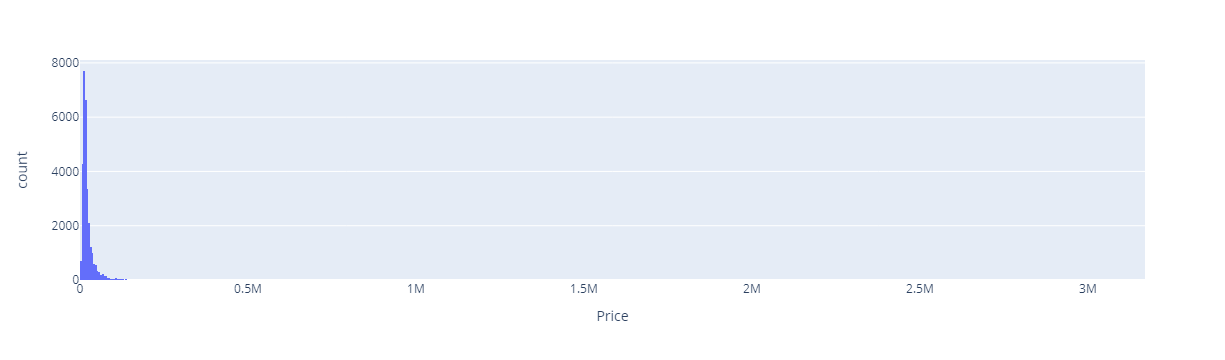

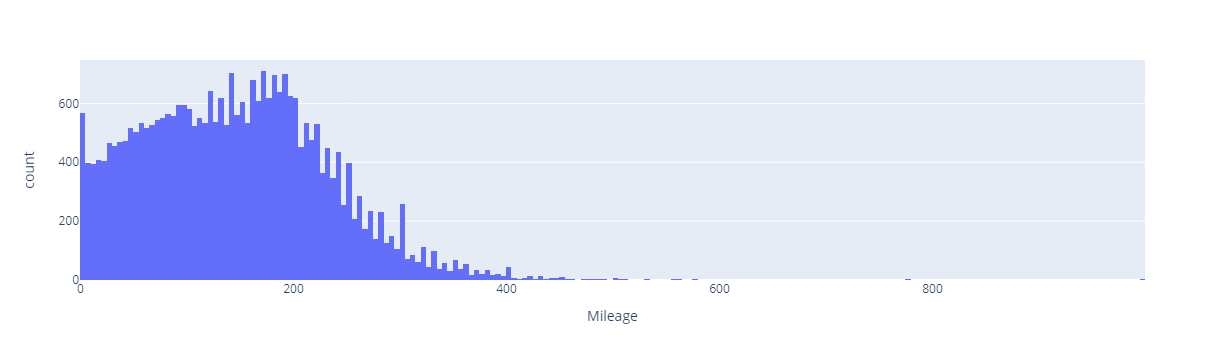

In [22]:
fig = px.histogram(df, x="Year")
fig1 = px.histogram(df, x="Price")
fig2 = px.histogram(df, x="Mileage", )
fig.show()
fig1.show()
fig2.show()

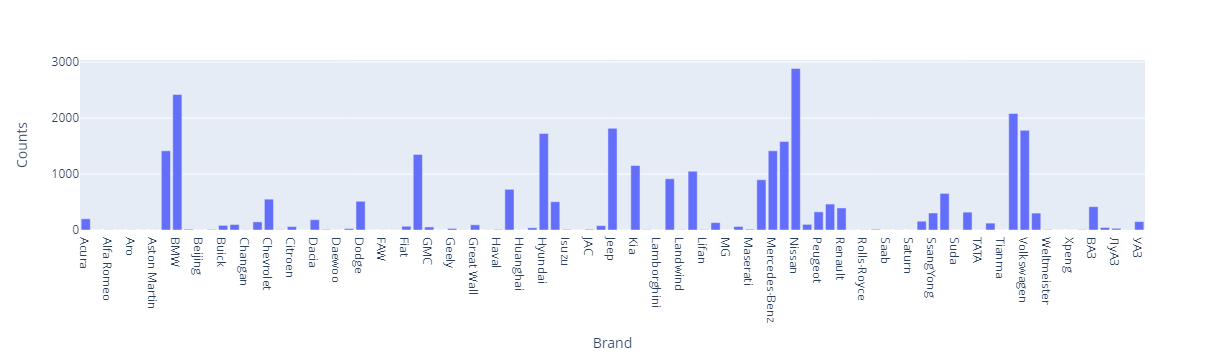

In [8]:
pie = df.groupby(by="Brand")['Model'].count().reset_index(name="Counts")
fig = px.bar(pie, x='Brand', y='Counts')
fig.show()

In [9]:
sportages = df.loc[df['Model'] == 'Sportage']
sportages = sportages.loc[sportages['Price'] <= 30000]

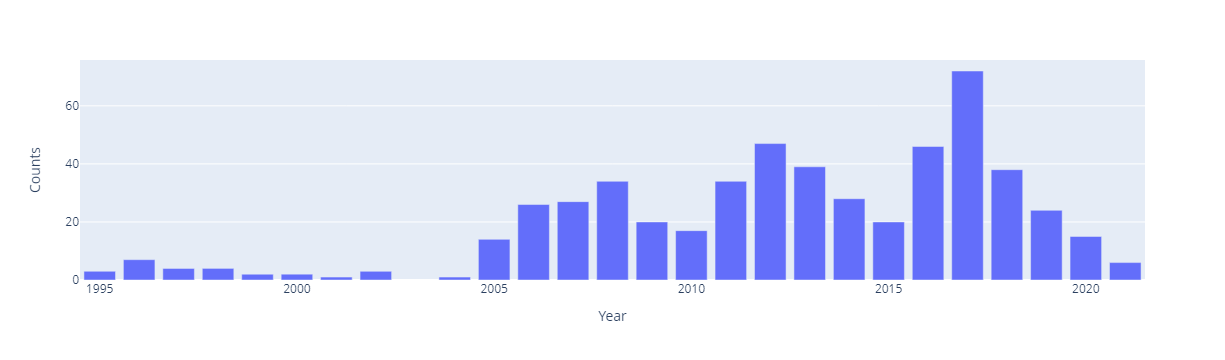

In [10]:
sportage_by_year = sportages.value_counts(subset=['Year']).reset_index(name='Counts')
px.bar(sportage_by_year, x='Year', y='Counts')

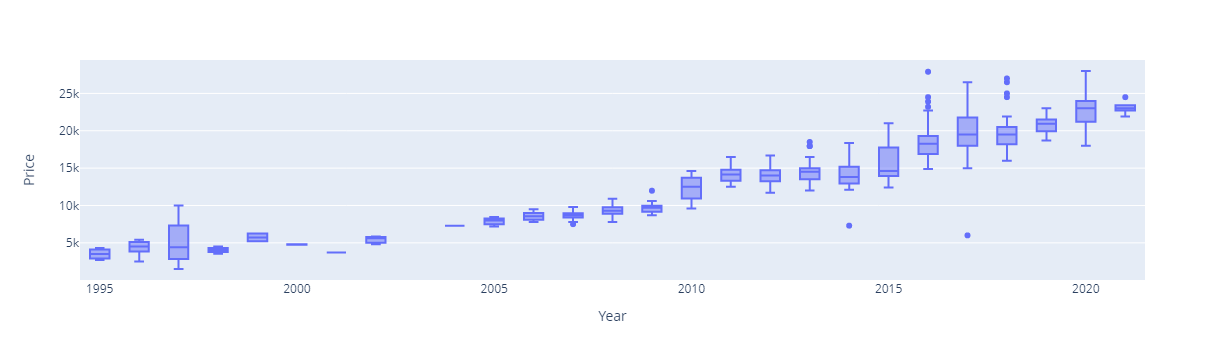

In [11]:
px.box(sportages, x='Year', y='Price', )

In [12]:
cactus_df = df.loc[df['Model'].str.contains('Cactus')] 

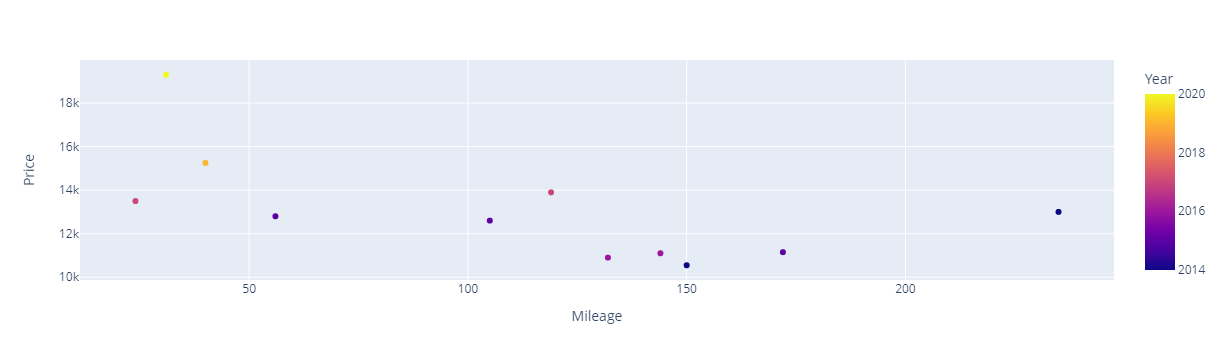

In [13]:
px.scatter(cactus_df.loc[cactus_df['Year']>= 2014], x='Mileage', y='Price', color='Year')

In [14]:
rogue_df = df.loc[df['Model'] == 'Rogue']
rogue_df = rogue_df.loc[rogue_df['Price'] <= 30000]

In [15]:
tucson_df = df.loc[df['Model'] == 'Tucson']
tucson_df = tucson_df.loc[tucson_df['Price'] <= 30000]

In [16]:
x5_df = df.loc[df["Model"] == "X5"]

In [23]:
def price_distribution(model_df, compare_with=None):
    
    fig = make_subplots(rows=2, cols=1, row_heights=[0.8, 0.2], shared_xaxes = True, vertical_spacing = 0)
    colors = px.colors.qualitative.Set1
    if compare_with is not None:
        if isinstance(compare_with, list):
            model_df = pd.concat([model_df, *compare_with])
        else:
            model_df = pd.concat([model_df, compare_with])
        
    i = 0
    for model_name, model_g_df in model_df.groupby("Model"):
        c = colors[i]
        brand_and_model = model_g_df["Brand"].iloc[0] + " " + model_name
        fig.add_trace(
            go.Box(x=model_g_df['Year'], y=model_g_df['Price'], marker_color=c,
                  legendgroup=model_name, legendgrouptitle_text=brand_and_model, name=f'Price (USD)'),
            row=1, col=1
        )
        model_g_count_df = model_g_df.groupby(by=['Year'])['Model'].count().reset_index(name='Count')
        fig.add_trace(
            go.Bar(x=model_g_count_df['Year'], y=model_g_count_df['Count'], legendgroup=model_name, 
                   name=f'Count', marker_color=c),
            row=2, col=1
        )
        i = i + 1
    fig.update_layout(
        {
        "boxmode": "group", 
        "height":450, 
        "yaxis2":{
            "showgrid":False,
            "nticks": 2,
        },
        "title": {
            "text": f"Price distribution (USD) & Count of positions on market",
            "x":0.5,
            "xanchor": "center"
        },
        "legend": {
            "y": 0.5
        }
    })
    return fig

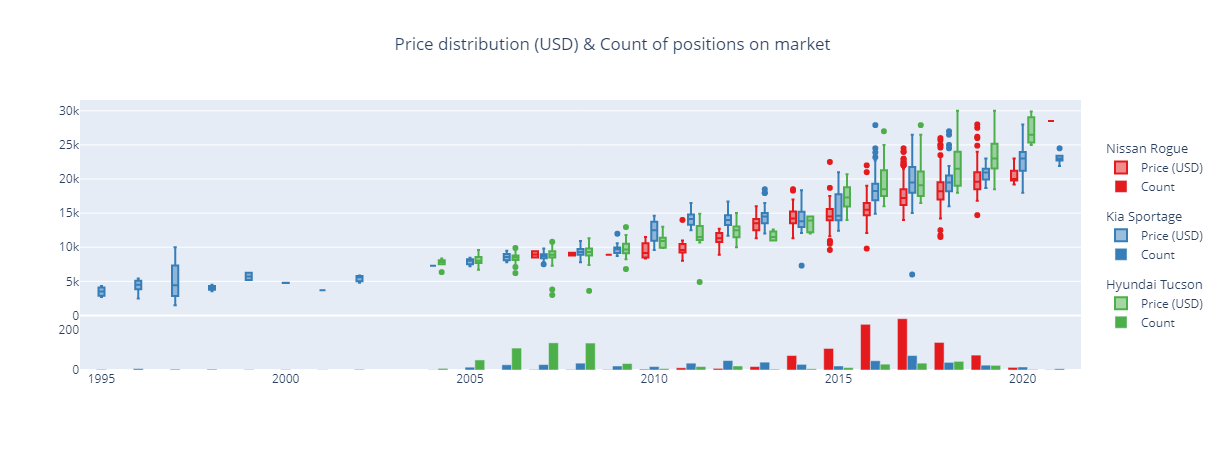

In [24]:
price_distribution(sportages, [rogue_df, tucson_df])

In [31]:
df.corr()

,Year,Price,Mileage,Accident,EngineСapacity
Year,1.00,0.16,-0.57,0.44,-0.11
Price,0.16,1.00,-0.15,-0.02,0.12
Mileage,-0.57,-0.15,1.00,-0.36,0.13
Accident,0.44,-0.02,-0.36,1.00,-0.04
EngineСapacity,-0.11,0.12,0.13,-0.04,1.00


In [32]:
df[df['Currency'] == 'USD'].corr()

,Year,Price,Mileage,Accident,EngineСapacity
Year,1.00,0.42,-0.57,0.45,-0.11
Price,0.42,1.00,-0.38,0.02,0.32
Mileage,-0.57,-0.38,1.00,-0.37,0.13
Accident,0.45,0.02,-0.37,1.00,-0.04
EngineСapacity,-0.11,0.32,0.13,-0.04,1.00
